In [1]:
# Load parameters. The structs generated by set_parameters_book.m are
# loades as Dictionaries
import scipy.io as sio
import numpy as np
import robustsp as rsp
from robustsp.RobustFiltering.examples.Auxiliary.create_environment_book import create_environment_book
from robustsp.RobustFiltering.examples.Auxiliary.set_parameters_book import *

#from robustsp.RobustFiltering.examples.Auxiliary.show_results_book import show_results_book

ekf_th = [] # will be filled with 2d npArrays
ekf_Hc = []

for ii in range(parameter['mc']):
    
    parameter['numbermc'] = ii
    
    # generate measurements
    parameter = create_environment_book(parameter,parameter['start'],parameter['sigma_v'])
    
    # generate random starting point
    randnvector = parameter['initial_sigma']*np.random.randn(4)
    theta_init  = parameter['start']+ randnvector
    
    # estimate positions using (robust) extended Kalman filter
    ekf_th.append(rsp.ekf_toa(parameter['MeasuredDistances'],theta_init,parameter['BS'],ekf)[0]) 
    ekf_Hc.append(rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[0])
    
# rsp.show_results_book

c:\users\computer\desktop\robustsp\robustsp\RobustFiltering\m_param_est.py:43: RuntimeWarning: invalid value encountered in double_scalars
  thresh = np.sum(np.abs((Theta[kk+1]-Theta[kk])/Theta[kk+1]))


In [7]:
theta_init

array([ 4.27524216e+03,  4.31912996e+03,  4.52832154e-01, -4.02125760e+00])

In [6]:
theta_init

array([ 4.27524216e+03,  4.31912996e+03,  4.52832154e-01, -4.02125760e+00])

In [5]:
rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[0]
rsp.ekf_toa_robust(parameter['MeasuredDistances'],theta_init,parameter['BS'],rekf)[1]

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[ 2.50144040e+03,  0.00000000e+00,  7.20400000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  2.50144040e+03,  0.00000000e+00,
          7.20400000e+00],
        [ 7.20400000e+00,  0.00000000e+00,  3.60400000e+01,
          0.00000000e+00],
        [ 0.00000000e+00,  7.20400000e+00,  0.00000000e+00,
          3.60400000e+01]],

       [[ 1.95954705e+03, -2.35196885e+01,  1.28438331e+01,
         -6.76963156e-02],
        [-2.35196885e+01,  1.96322196e+03, -6.76963156e-02,
          1.28544106e+01],
        [ 1.28438331e+01, -6.76963156e-02,  3.60754749e+01,
         -1.94849143e-04],
        [-6.76963156e-02,  1.28544106e+

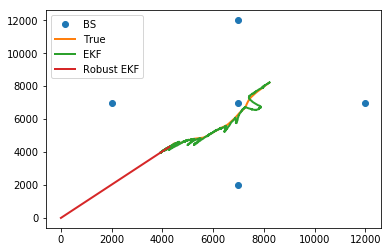

In [2]:
# show_results_book

import matplotlib.pyplot as plt

# plotting trajectories
ekf_th_x = np.zeros(parameter['N'])
ekf_th_y = np.zeros(parameter['N'])
ekf_Hc_x = np.zeros(parameter['N'])
ekf_Hc_y = np.zeros(parameter['N'])
for ii in range(parameter['N']):
    # Least-squares estimation
    ekf_th_x[ii] = ekf_th[0][0][ii]
    ekf_th_y[ii] = ekf_th[0][1][ii]
    # Robust M-estimation
    ekf_Hc_x[ii] = ekf_Hc[0][0][ii]
    ekf_Hc_y[ii] = ekf_Hc[0][1][ii]  
    
# parameter ??? line 22 in .m file

plt.figure(0)
plt.plot(parameter['BS'][:,0], parameter['BS'][:,1], 'o', linewidth=2, label='BS')
plt.plot(parameter['thx'],parameter['thy'], linewidth=2,label='True')
plt.plot(ekf_th_x, ekf_th_y, linewidth=2, label='EKF')
plt.plot(ekf_Hc_x, ekf_Hc_y, linewidth=2, label='Robust EKF')
plt.legend() 


In [1]:
loadmat = lambda x: sio.loadmat(x)[x]

def matStruct2Dict(x):
    struct  = loadmat(x)
    dic     = {}
    for i in struct.dtype.names:
        dic[i] = struct[i][0][0]
    return dic

ekf = matStruct2Dict('ekf')
ekf_Hc = loadmat('ekf_Hc')
ekf_th = loadmat('ekf_th')
ii = loadmat('ii')
parameter = matStruct2Dict('parameter')
rekf = matStruct2Dict('rekf')
x1 = loadmat('x1')